# Glaciology: Practical 1 (Sep 11)

#### Anna Chen (yc4406)
#### Last updated on Sep 11, 2025

Derivation:
    
Consider a cuboid $(x,y,z)$, where pressure from each opposing side pairs are balanced with each other. Hence, the only pressure we should be concerned about is the top and bottom pressure.

Let the pressure from the top be $P_2$ acting downwards, and the pressure from the bottom be $P_1$ acting upwards. The weight $W = V \rho g$ also acts downwards.

Calculate the force of $P_1$ and $P_2$. We can define positive \= upwards.
$F_1=P_1 A = P_1 \partial x \partial y$
$F_2=P_2 A = P_2 \partial x \partial y$

Assume $a$ is 0, so:
$$F=ma = 0$$

The overall force is:
\begin{align*}
    F &= P_1 \partial x \partial y - P_2 \partial x \partial y - W \\
    &= P_1 \partial x \partial y - P_2 \partial x \partial y - V \rho g \\
    &= P_1 \partial x \partial y - P_2 \partial x \partial y - \partial x \partial y \partial z \rho g
\end{align*}

We know the change in pressure is the change in depth multiplied by how pressure changes with depth:
$$\Delta P = P_2 - P_1= \partial z \frac{dP}{dz}$$
We now can write $P_2$  in terms of $P_1$:
$$P_2 = P_1 + \partial z \frac{dP}{dz}$$

So we can rewrite:
\begin{align*}
    F &= P_1 \partial x \partial y - P_2 \partial x \partial y - \partial x \partial y \partial z \rho g\\
    &= P_1 \partial x \partial y - (P_1 + \partial z \frac{dP}{dz} ) (\partial x \partial y) - \partial x \partial y \partial z \rho g\\
    &= P_1 - P_1 + \partial z \frac{dP}{dz} - \partial z \rho g\\
    &= \partial z \frac{dP}{dZ} - \partial z \rho g \\
    &= 0
\end{align*}

Hence:
\begin{align*}
    \partial z \frac{dP}{dZ} &= -\partial z \rho g \\
    \frac{dP}{dZ}  &= -\rho g
\end{align*}

Given this, we can integrate both sides:
\begin{align*}
    dP &= (- \rho g )dz \\
    \int_0^P dP &= (- \rho g) \int_{z_s}^{z}dz \\
    P - 0 &= (-\rho g) (z - z_s) \\
    P &= \rho g (z_s - z)
\end{align*}

We can re-arrange the last equation as:
\begin{align*}
    P_{i+1} - P_i &= - \Delta z \rho g \\
    P_{i+1} &= P_i - \Delta z \rho g
\end{align*}

In [3]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [22]:
D = np.loadtxt("SIR_density.csv", delimiter=',', skiprows=1)
print("The first 10 rows of data: \n \n", D[0:11,:])

The first 10 rows of data: 
 
 [[  2.4       505.1646305]
 [  3.2       422.2508586]
 [  4.        468.5011014]
 [  4.8       484.4254977]
 [  5.6       483.124596 ]
 [  6.4       511.784361 ]
 [  7.2       540.6036147]
 [  8.        532.5673888]
 [  8.8       534.6511122]
 [  9.6       558.5907804]
 [ 10.4       555.1254326]]


In [27]:
print("The number of rows is: ", D.shape[0])

The number of rows is:  362


In [32]:
print("The maxiumum depth is: ", D[-1,0])

The maxiumum depth is:  291.2


$\textbf{1. How many data points are there?}$

There are 362 data points for density.

$\textbf{2. How deep was the ice core?}$

The maximum depth is 291.20 m.

In [30]:
print("The density at the surface is: ", D[0,1])

The density at the surface is:  505.1646305


In [38]:
z = 30
depth_interp = np.interp(z, D[:,0], D[:,1])
print("The density at", z, "m is: ", depth_interp)

The density at 30 m is:  699.6995052999999


$\textbf{3. What is the density at the surface? What is the density at 30 m?}$

At the surface: 505.16 $\frac{kg}{m^3}$.

At 30m: 700.00 $\frac{kg}{m^3}$.

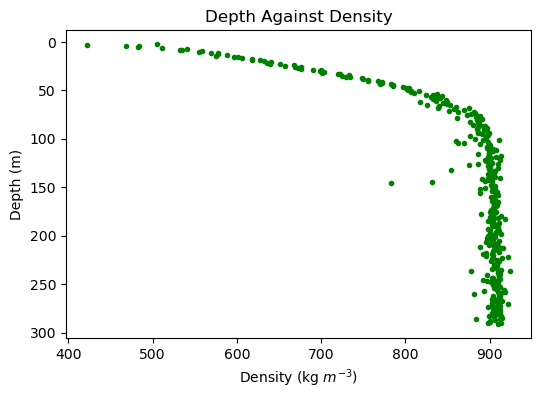

In [49]:
fig = plt.figure(figsize=(6,4))
axes = fig.add_subplot(1, 1, 1)
density_depth = axes.plot(density, depth, marker = '.', linestyle = '')
axes.set_xlabel("Density (kg $m^{-3}$)")
axes.set_ylabel("Depth (m)")
axes.set_title("Depth Against Density")
axes.invert_yaxis()
density_depth[0].set_color('g')

In [56]:
for i in range(0, D.shape[0]):
    if D[i,0] <= 50:
        continue
    else:
        first_50m_row = i
        print("The row number where depth reaches 50m is: ", first_50m_row)
    break

last_200m_begins = D[-1,0] - 200
print("The depth where the bottom 200m begins is: ", last_200m_begins)

for i in range(0, D.shape[0]):
    if D[i,0] <= last_200m_begins:
        continue
    else:
        last_200m_row = i
        print("The row number where the last 200m of depth begins is: ", last_200m_row)
    break

mean_first_50m = np.mean(D[0:first_50m_row, :])
mean_last_200m = np.mean(D[last_200m_row:, :])

print("The mean density of the first 50m is: ", mean_first_50m)
print("The mean density of the last 200m is: ", mean_last_200m)

The row number where depth reaches 50m is:  60
The depth where the bottom 200m begins is:  91.19999999999999
The row number where the last 200m of depth begins is:  111
The mean density of the first 50m is:  343.6417791291667
The mean density of the last 200m is:  546.7576863320717


$\textbf{5. What is the average density in the top 50 m and in the bottom 200m?}$

The mean density of the first 50m is:  343.64

The mean density of the last 200m is:  546.75

Recall from above that:
$$\frac{dP}{dZ}  = -\rho g$$

In [ ]:
g = 9.81

def pressure(depth):
    